# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Imelda Margaret Kristiani]
- **Email:** [imeldamargareth23@gmail.com]
- **ID Dicoding:** [M891D5X0843]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana karakteristik pelanggan berdasarkan perilaku pembelian mereka menggunakan pendekatan RFM Analysis?
- Pertanyaan 2 : Kategori produk apa yang paling berkontribusi terhadap total pendapatan dan bagaimana pola pembeliannya?
- Pertanyaan 3 : Apakah terdapat pola waktu tertentu yang memengaruhi jumlah transaksi dan total pendapatan?
- Pertanyaan 4 : Wilayah mana yang memberikan kontribusi terbesar terhadap pendapatan dan jumlah pelanggan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/analyst-dataset/E-commerce-dataset.zip'
extract_root = '/content/drive/MyDrive/analyst-dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_root)

In [ ]:
os.listdir(extract_root)

['E-commerce-dataset.zip', 'E-Commerce Public Dataset']

In [ ]:
data_path = os.path.join(extract_root, 'E-Commerce Public Dataset')
os.listdir(data_path)

['geolocation_dataset.csv',
 'order_items_dataset.csv',
 'order_reviews_dataset.csv',
 'orders_dataset.csv',
 'customers_dataset.csv',
 'order_payments_dataset.csv',
 'New Text Document.txt',
 'product_category_name_translation.csv',
 'products_dataset.csv',
 'sellers_dataset.csv']

In [ ]:
# Load Dataset
customers = pd.read_csv(os.path.join(data_path, 'customers_dataset.csv'))
geolocation = pd.read_csv(os.path.join(data_path, 'geolocation_dataset.csv'))
orders = pd.read_csv(os.path.join(data_path, 'orders_dataset.csv'))
order_items = pd.read_csv(os.path.join(data_path, 'order_items_dataset.csv'))
order_payments = pd.read_csv(os.path.join(data_path, 'order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.join(data_path, 'order_reviews_dataset.csv'))
products = pd.read_csv(os.path.join(data_path, 'products_dataset.csv'))
sellers = pd.read_csv(os.path.join(data_path, 'sellers_dataset.csv'))
product_category = pd.read_csv(os.path.join(data_path, 'product_category_name_translation.csv'))

**Insight:**
- Data dikumpulkan dengan menghubungkan Google Colab ke Google Drive untuk mengakses dataset yang tersimpan secara eksternal. Dataset tersedia dalam bentuk berkas ZIP yang kemudian diekstraksi untuk memperoleh beberapa file CSV. Seluruh file CSV dimuat ke dalam DataFrame agar dapat dilakukan proses analisis lebih lanjut.

### Assessing Data

In [ ]:
datasets = {
    "Customers": customers,
    "Orders": orders,
    "Order Items": order_items,
    "Products": products,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews
}

for name, df in datasets.items():
    print("=" * 60)
    print(f"Dataset: {name}")
    print("=" * 60)

    # Menampilkan 5 baris pertama
    print("\n🔹 Preview Data:")
    display(df.head())

    # Menampilkan informasi struktur dataset
    print("\n🔹 Struktur Data:")
    df.info()

    # Mengecek missing values
    print("\n🔹 Missing Values:")
    display(df.isna().sum())

Dataset: Customers

🔹 Preview Data:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



🔹 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

🔹 Missing Values:


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Dataset: Orders

🔹 Preview Data:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



🔹 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

🔹 Missing Values:


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Dataset: Order Items

🔹 Preview Data:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



🔹 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

🔹 Missing Values:


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Dataset: Products

🔹 Preview Data:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



🔹 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

🔹 Missing Values:


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Dataset: Order Payments

🔹 Preview Data:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



🔹 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

🔹 Missing Values:


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Dataset: Order Reviews

🔹 Preview Data:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



🔹 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

🔹 Missing Values:


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Tahap assessing data menunjukkan bahwa setiap dataset memiliki peran yang berbeda dalam sistem e-commerce. Dataset `customers` sebagai identitas pelanggan, `orders` berfungsi sebagai pencatat siklus transaksi, `order_items` sebagai representasi unit ekonomi penjualan, serta `products` sebagai penghubung ke kategori produk. Keempat dataset ini ditetapkan sebagai dataset inti karena secara langsung digunakan untuk menjawab pertanyaan bisnis terkait segmentasi pelanggan (RFM) dan kontribusi pendapatan.

- Dataset lain seperti `order_payments` dan `order_reviews` tetap dilakukan pemeriksaan awal, namun diperlakukan sebagai data pendukung karena tidak berkontribusi langsung terhadap perhitungan nilai transaksi maupun segmentasi pelanggan. Oleh karena itu, analisis mendalam difokuskan pada dataset inti, sementara dataset pendukung dianalisis secara terbatas atau pada tahap lanjutan sesuai kebutuhan analisis.

- Selain itu, hasil assessing menunjukkan adanya kolom bertipe tanggal yang masih berformat object serta beberapa nilai kosong, sehingga diperlukan proses pembersihan data sebelum dilakukan analisis lebih lanjut.

### Cleaning Data

In [ ]:
# Cleaning customers Dataset

customers_clean = customers.copy()

# Cek jumlah data awal
print("Jumlah data awal:", customers_clean.shape[0])

# Cek missing values
print("\nMissing values sebelum cleaning:")
print(customers_clean[["customer_id", "customer_unique_id", "customer_state"]].isna().sum())

# Drop baris dengan missing value pada kolom kritis
customers_clean = customers_clean.dropna(subset=["customer_id", "customer_unique_id", "customer_state"])

# Standarisasi teks lokasi
customers_clean["customer_city"] = (customers_clean["customer_city"] .str.lower() .str.strip())

customers_clean["customer_state"] = (customers_clean["customer_state"] .str.upper() .str.strip())

# Reset index setelah cleaning
customers_clean.reset_index(drop=True, inplace=True)

# Validasi hasil
print("\nJumlah data setelah cleaning:", customers_clean.shape[0])

print("\nMissing values setelah cleaning:")
print(customers_clean[["customer_id", "customer_unique_id", "customer_state"]].isna().sum())

# Preview data hasil cleaning
print("\nPreview data customers_clean:")
display(customers_clean.head())

# Cek struktur data
print("\nStruktur data:")
customers_clean.info()

Jumlah data awal: 99441

Missing values sebelum cleaning:
customer_id           0
customer_unique_id    0
customer_state        0
dtype: int64

Jumlah data setelah cleaning: 99441

Missing values setelah cleaning:
customer_id           0
customer_unique_id    0
customer_state        0
dtype: int64

Preview data customers_clean:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Struktur data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Cleaning orders Dataset

orders_clean = orders.copy()

# Mengubah kolom menjadi tipe datetime
orders_clean['order_purchase_timestamp'] = pd.to_datetime(orders_clean['order_purchase_timestamp'])
orders_clean['order_delivered_customer_date'] = pd.to_datetime(orders_clean['order_delivered_customer_date'])

# Memfilter order yang berstatus delivered
orders_clean = orders_clean[orders_clean['order_status'] == 'delivered']

# Kolom relevan untuk analisis RFM
orders_clean = orders_clean[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date']]

# Reset index setelah filtering
orders_clean.reset_index(drop=True, inplace=True)

# Ringkasan hasil cleaning
print("Jumlah order setelah cleaning:", orders_clean.shape[0])
print("\nPreview data orders_clean:")
orders_clean.head()

Jumlah order setelah cleaning: 96478

Preview data orders_clean:


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02


In [ ]:
# Cleaning order_items Dataset

order_items_clean = order_items.copy()

# Filter order_items yang berasal dari order valid (delivered)
order_items_clean = order_items_clean[order_items_clean['order_id'].isin(orders_clean['order_id'])]

# Cek missing values pada kolom krusial unit ekonomi
print("Missing values sebelum cleaning:")
print(order_items_clean[['order_id', 'product_id', 'price', 'freight_value']].isna().sum())

# Hapus baris dengan harga atau ongkir kosong
order_items_clean = order_items_clean.dropna(subset=['price', 'freight_value'])

# Hapus item dengan harga tidak valid (<= 0)
order_items_clean = order_items_clean[order_items_clean['price'] > 0]

# Memastikan tipe data numerik untuk agregasi
order_items_clean['price'] = order_items_clean['price'].astype(float)
order_items_clean['freight_value'] = order_items_clean['freight_value'].astype(float)

# Reset index dataset setelah filtering
order_items_clean.reset_index(drop=True, inplace=True)

# Ringkasan hasil cleaning
print("\nJumlah item setelah cleaning:", order_items_clean.shape[0])
print("\nPreview data order_items_clean:")
display(order_items_clean.head())

print("\nStruktur data:")
order_items_clean.info()

Missing values sebelum cleaning:
order_id         0
product_id       0
price            0
freight_value    0
dtype: int64

Jumlah item setelah cleaning: 110197

Preview data order_items_clean:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Struktur data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             110197 non-null  object 
 1   order_item_id        110197 non-null  int64  
 2   product_id           110197 non-null  object 
 3   seller_id            110197 non-null  object 
 4   shipping_limit_date  110197 non-null  object 
 5   price                110197 non-null  float64
 6   freight_value        110197 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.9+ MB


In [ ]:
# Cleaning products Dataset

products_clean = products.copy()

# Cek missing value sebelum cleaning
print("Missing values sebelum cleaning:")
print(products_clean.isna().sum())

# Produk tanpa kategori tetap dipertahankan dengan label unknown
products_clean['product_category_name'] = products_clean['product_category_name'].fillna('unknown')

# Reset index
products_clean.reset_index(drop=True, inplace=True)

# Cek ulang missing value setelah cleaning
print("\nMissing values setelah cleaning:")
print(products_clean.isna().sum())

# Preview data
print("\nPreview data products_clean:")
display(products_clean.head())

# Struktur data akhir
print("\nStruktur data:")
products_clean.info()

Missing values sebelum cleaning:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing values setelah cleaning:
product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Preview data products_clean:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Struktur data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Cleaning order_payments Dataset

order_payments_clean = order_payments.copy()

# Cek missing values
print("Missing values sebelum cleaning:")
print(order_payments_clean.isna().sum())

# Validasi tipe data numerik
order_payments_clean['payment_sequential'] = order_payments_clean['payment_sequential'].astype(int)
order_payments_clean['payment_installments'] = order_payments_clean['payment_installments'].astype(int)

# payment_value harus bertipe float
order_payments_clean['payment_value'] = order_payments_clean['payment_value'].astype(float)

# Menghapus baris dengan nilai payment_value <= 0
order_payments_clean = order_payments_clean[order_payments_clean['payment_value'] > 0]

# Cek ulang missing values setelah cleaning
print("\nMissing values setelah cleaning:")
print(order_payments_clean.isna().sum())

# Informasi jumlah data setelah cleaning
print("\nJumlah data setelah cleaning:", len(order_payments_clean))

# Preview data hasil cleaning
print("\nPreview data order_payments_clean:")
display(order_payments_clean.head())

# Struktur data akhir
print("\nStruktur data:")
order_payments_clean.info()


Missing values sebelum cleaning:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing values setelah cleaning:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah data setelah cleaning: 103877

Preview data order_payments_clean:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Struktur data:
<class 'pandas.core.frame.DataFrame'>
Index: 103877 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103877 non-null  object 
 1   payment_sequential    103877 non-null  int64  
 2   payment_type          103877 non-null  object 
 3   payment_installments  103877 non-null  int64  
 4   payment_value         103877 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [ ]:
# Cleaning order_reviews Dataset

reviews = order_reviews.copy()

# Kolom relevan dengan pertanyaan bisnis
reviews_clean = reviews[["order_id", "review_score", "review_creation_date"]]

# Drop baris dengan review_score kosong
reviews_clean = reviews_clean.dropna(subset=["review_score"])

# Pastikan nilai review_score valid (1 sampai 5)
reviews_clean = reviews_clean[reviews_clean["review_score"].between(1, 5)]

# Konversi review_creation_date ke format datetime
reviews_clean["review_creation_date"] = pd.to_datetime(reviews_clean["review_creation_date"])

# Jika ada lebih dari satu review, ambil yang terakhir
reviews_clean = (
    reviews_clean
    .sort_values("review_creation_date")
    .drop_duplicates(subset="order_id", keep="last")
)

# Reset index agar rapi
reviews_clean = reviews_clean.reset_index(drop=True)

# Cek hasil akhir cleaning
print("Jumlah data setelah cleaning:", reviews_clean.shape[0])
print("\nMissing values setelah cleaning:")
print(reviews_clean.isna().sum())

print("\nPreview data order_reviews_clean:")
display(reviews_clean.head())

print("\nStruktur data:")
reviews_clean.info()


Jumlah data setelah cleaning: 98673

Missing values setelah cleaning:
order_id                0
review_score            0
review_creation_date    0
dtype: int64

Preview data order_reviews_clean:


,order_id,review_score,review_creation_date
0,809a282bbd5dbcabb6f2f724fca862ec,1,2016-10-02
1,bfbd0f9bdef84302105ad712db648a6c,1,2016-10-06
2,e5215415bb6f76fe3b7cb68103a0d1c0,1,2016-10-09
3,e2144124f98f3bf46939bc5183104041,4,2016-10-15
4,9aa3197e4887919fde0307fc23601d7a,4,2016-10-15



Struktur data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98673 entries, 0 to 98672
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              98673 non-null  object        
 1   review_score          98673 non-null  int64         
 2   review_creation_date  98673 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB


**Insight:**
- Secara keseluruhan, proses cleaning menunjukkan bahwa dataset inti e-commerce berada dalam kondisi siap analisis tanpa kehilangan informasi bisnis yang penting. Dataset `customers` berfungsi sebagai referensi identitas dan wilayah pelanggan yang stabil, sementara `orders` telah difokuskan hanya pada transaksi berhasil (delivered) sehingga merepresentasikan aktivitas pembelian nyata. Dataset `order_items` dan `products` membentuk fondasi utama analisis pendapatan, dengan data transaksi yang lengkap dan kategori produk yang valid meskipun sebagian metadata deskriptif produk terbatas. Dataset `order_payments` mendukung pemahaman pola pembayaran dan cicilan pelanggan, sedangkan `order_reviews` menyediakan representasi kepuasan pelanggan yang bersih dan konsisten untuk dikaitkan dengan durasi pengiriman. Dengan kondisi ini, keseluruhan dataset dinilai layak dan memadai untuk menjawab seluruh pertanyaan bisnis terkait perilaku pelanggan, kontribusi pendapatan, pola waktu transaksi, kepuasan pengiriman, dan distribusi wilayah.

## Exploratory Data Analysis (EDA)

### Data Integration Check

In [ ]:
# Cek jumlah data awal
print("Jumlah data awal:")
print("Customers :", customers_clean.shape)
print("Orders    :", orders_clean.shape)
print("OrderItems:", order_items_clean.shape)
print("Products  :", products_clean.shape)
print("Payments  :", order_payments_clean.shape)
print("Reviews   :", reviews_clean.shape)

# 1. Join Orders + Customers
# (untuk analisis perilaku & wilayah)
orders_customers = orders_clean.merge(
    customers_clean,
    on="customer_id",
    how="left"
)

# Cek apakah ada order yang kehilangan customer
missing_customer = orders_customers["customer_unique_id"].isna().sum()

print("\nJoin Orders + Customers")
print("Shape:", orders_customers.shape)
print("Order tanpa customer:", missing_customer)

# 2. Join Orders + Order Items
# (inti transaksi & revenue)
orders_items = orders_customers.merge(
    order_items_clean,
    on="order_id",
    how="inner"
)

print("\nJoin Orders + Order Items")
print("Shape:", orders_items.shape)

# 3. Join dengan Products
# (untuk kategori produk & analisis revenue per kategori)
orders_items_products = orders_items.merge(
    products_clean,
    on="product_id",
    how="left"
)

missing_product = orders_items_products["product_category_name"].isna().sum()

print("\nJoin + Products")
print("Shape:", orders_items_products.shape)
print("Item tanpa kategori produk:", missing_product)

# 4. Validasi Revenue
# (Revenue dihitung dari price + freight_value)
orders_items_products["revenue"] = (
    orders_items_products["price"] + orders_items_products["freight_value"]
)

total_revenue = orders_items_products["revenue"].sum()

print("\nValidasi Revenue")
print("Total Revenue:", round(total_revenue, 2))

# 5. Join Reviews (untuk EDA kepuasan)
orders_full = orders_items_products.merge(
    reviews_clean,
    on="order_id",
    how="left"
)

missing_review = orders_full["review_score"].isna().sum()

print("\nJoin + Reviews")
print("Shape:", orders_full.shape)
print("Order tanpa review:", missing_review)

# 6. Dataset final untuk EDA
print("\nDataset FINAL siap EDA:")
print(orders_full.info())

Jumlah data awal:
Customers : (99441, 5)
Orders    : (96478, 4)
OrderItems: (110197, 7)
Products  : (32951, 9)
Payments  : (103877, 5)
Reviews   : (98673, 3)

Join Orders + Customers
Shape: (96478, 8)
Order tanpa customer: 0

Join Orders + Order Items
Shape: (110197, 14)

Join + Products
Shape: (110197, 22)
Item tanpa kategori produk: 0

Validasi Revenue
Total Revenue: 15419773.75

Join + Reviews
Shape: (110197, 25)
Order tanpa review: 827

Dataset FINAL siap EDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   customer_id                    110197 non-null  object        
 2   order_purchase_timestamp       110197 non-null  datetime64[ns]
 3   order_delivered_customer_date  110189 non-null  datetime64[ns]
 4   custome

### 1. RFM Analysis

In [ ]:
# RFM Analysis

# Kolom waktu sudah bertipe datetime
orders_full['order_purchase_timestamp'] = pd.to_datetime(
    orders_full['order_purchase_timestamp']
)

# Menentukan reference date
reference_date = orders_full['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
print("Reference Date:", reference_date)

# Menghitung metrik RFM per customer
rfm = (
    orders_full
    .groupby('customer_unique_id')
    .agg({
        'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
        'order_id': 'nunique',
        'revenue': 'sum'
    })
    .reset_index()
)

# Rename kolom sesuai RFM
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# Cek hasil awal
print("Jumlah pelanggan unik:", rfm.shape[0])
rfm.head()


Reference Date: 2018-08-30 15:00:37
Jumlah pelanggan unik: 93358


,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [ ]:
# Statistik RFM
rfm.describe()

,recency,frequency,monetary
count,93358.000000,93358.000000,93358.000000
mean,237.941773,1.033420,165.168210
std,152.591453,0.209097,226.292101
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.010000
50%,219.000000,1.000000,107.780000
75%,346.000000,1.000000,182.510000
max,714.000000,15.000000,13664.080000


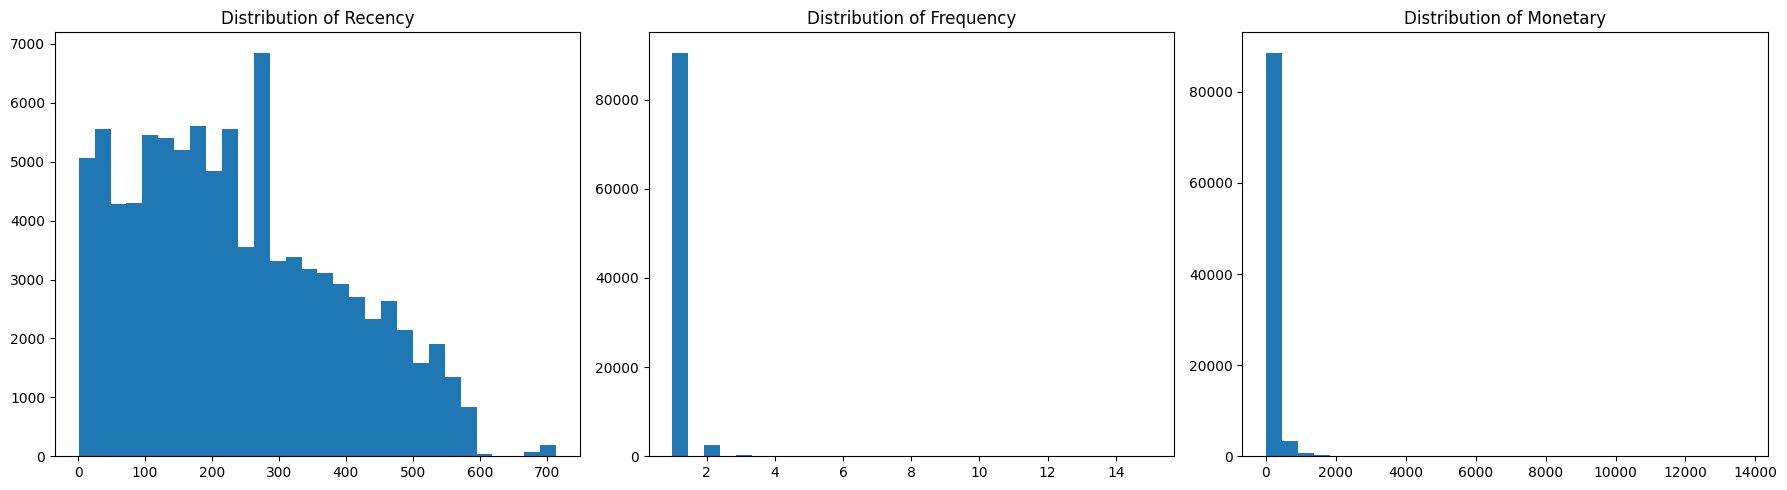

In [ ]:
# Distribusi RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(rfm['recency'], bins=30)
axes[0].set_title('Distribution of Recency')

axes[1].hist(rfm['frequency'], bins=30)
axes[1].set_title('Distribution of Frequency')

axes[2].hist(rfm['monetary'], bins=30)
axes[2].set_title('Distribution of Monetary')

plt.tight_layout()
plt.show()

In [ ]:
# RFM Scoring

rfm_score = rfm.copy()

# Recency Score
rfm_score['R_score'] = pd.qcut(
    rfm_score['recency'],
    q=4,
    labels=[4, 3, 2, 1]
)

# Frequency Score
rfm_score['F_score'] = pd.qcut(
    rfm_score['frequency'].rank(method='first'),
    q=4,
    labels=[1, 2, 3, 4]
)

# Monetary Score
rfm_score['M_score'] = pd.qcut(
    rfm_score['monetary'],
    q=4,
    labels=[1, 2, 3, 4]
)

# Gabungkan skor jadi satu string
rfm_score['RFM_score'] = (
    rfm_score['R_score'].astype(str) +
    rfm_score['F_score'].astype(str) +
    rfm_score['M_score'].astype(str)
)

# Lihat hasil awal
rfm_score.head()

,customer_unique_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214


In [ ]:
# RFM Segmentation

rfm_segment = rfm_score.copy()

def rfm_segmenter(row):
    R = int(row['R_score'])
    F = int(row['F_score'])
    M = int(row['M_score'])

    # Pelanggan yang baru belanja, sering belanja, dan nilai transaksi tinggi
    if R >= 3 and F >= 3 and M >= 3:
        return 'Champions'

    # Pelanggan yang sering belanja dan masih cukup aktif
    elif F >= 3 and R >= 2:
        return 'Loyal Customers'

    # Pelanggan yang baru belanja tapi belum sering
    elif R >= 3 and F <= 2:
        return 'Potential Loyalist'

    # Pelanggan yang baru belanja dengan nilai transaksi tinggi, tapi belum sering
    elif R >= 3 and M >= 3:
        return 'Big Spender (New)'

    # Pelanggan yang dulu sering belanja, tapi sekarang mulai jarang
    elif R <= 2 and (F >= 3 or M >= 3):
        return 'At Risk'

    # Lainnya
    elif R <= 2 and F <= 2 and M <= 2:
        return 'Hibernating'

    else:
        return 'Others'

# Terapkan segmentasi ke data
rfm_segment['segment'] = rfm_segment.apply(rfm_segmenter, axis=1)

# Lihat distribusi segment
rfm_segment['segment'].value_counts()

,count
segment,
Potential Loyalist,23356
Loyal Customers,22876
At Risk,22720
Champions,12292
Hibernating,12114


In [ ]:
# Revenue per Segment

# Agregasi revenue per segment
segment_revenue = (
    rfm_segment
    .groupby('segment')
    .agg(
        total_revenue=('monetary', 'sum'),
        avg_revenue=('monetary', 'mean'),
        customer_count=('customer_unique_id', 'count')
    )
    .sort_values(by='total_revenue', ascending=False)
)

# Hitung kontribusi revenue (%)
segment_revenue['revenue_pct'] = (
    segment_revenue['total_revenue'] /
    segment_revenue['total_revenue'].sum() * 100
)

segment_revenue

,total_revenue,avg_revenue,customer_count,revenue_pct
segment,,,,
At Risk,4907811.78,216.012842,22720,31.828040
Potential Loyalist,3759424.95,160.961849,23356,24.380545
Champions,3340718.31,271.779882,12292,21.665158
Loyal Customers,2639574.35,115.386184,22876,17.118113
Hibernating,772244.36,63.748090,12114,5.008143


### 2. Product Category & Revenue

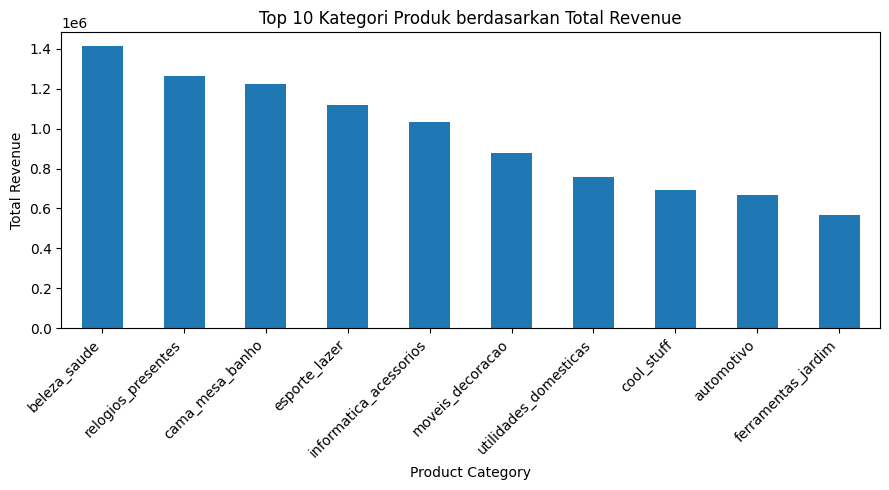

In [ ]:
# Kontribusi Revenue per Kategori

# Group by kategori produk untuk menghitung total revenue
category_revenue = (
    orders_full
    .groupby('product_category_name')['revenue']
    .sum()
    .sort_values(ascending=False)
)

# Ambil 10 kategori dengan revenue terbesar
top10_category_revenue = category_revenue.head(10)

plt.figure(figsize=(9, 5))
top10_category_revenue.plot(kind='bar')

plt.title('Top 10 Kategori Produk berdasarkan Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

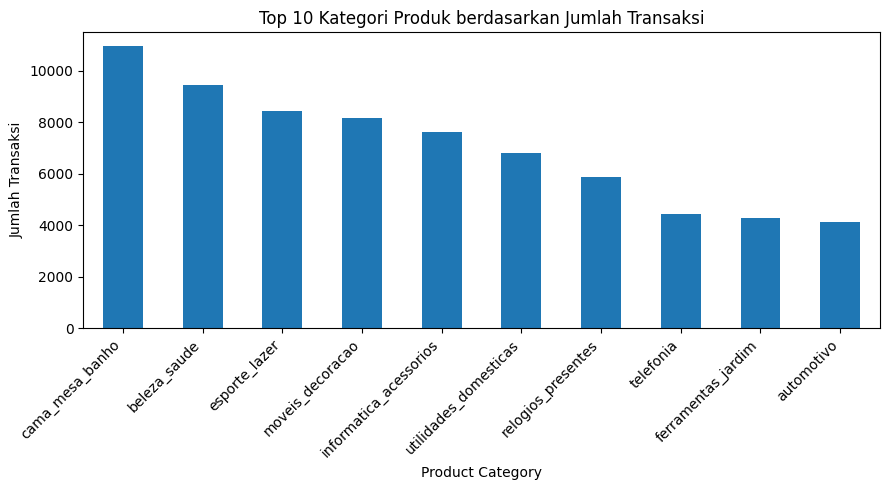

In [ ]:
# Jumlah transaksi (order item) per kategori
category_orders = (
    orders_full
    .groupby('product_category_name')['order_id']
    .count()
    .sort_values(ascending=False)
)

top10_category_orders = category_orders.head(10)

plt.figure(figsize=(9, 5))
top10_category_orders.plot(kind='bar')

plt.title('Top 10 Kategori Produk berdasarkan Jumlah Transaksi')
plt.xlabel('Product Category')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

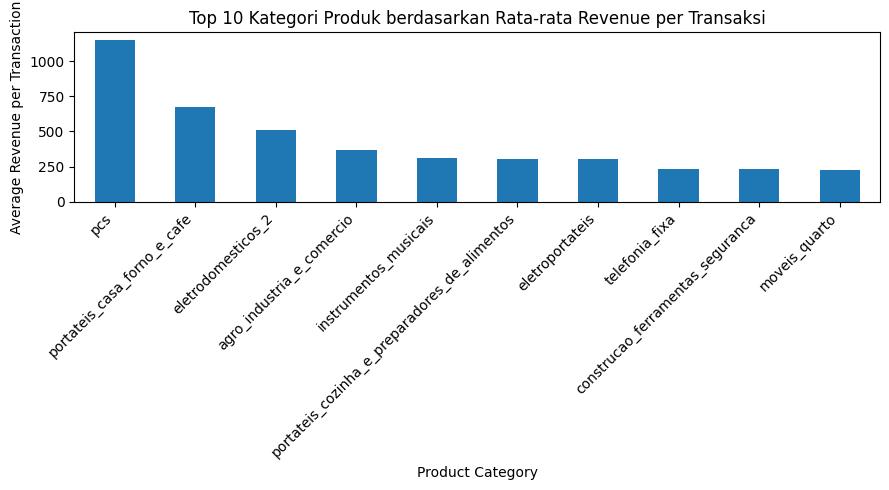

In [ ]:
# Rata-rata revenue per transaksi untuk tiap kategori
category_avg_revenue = (
    orders_full
    .groupby('product_category_name')['revenue']
    .mean()
    .sort_values(ascending=False)
)

top10_category_avg = category_avg_revenue.head(10)

plt.figure(figsize=(9, 5))
top10_category_avg.plot(kind='bar')

plt.title('Top 10 Kategori Produk berdasarkan Rata-rata Revenue per Transaksi')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue per Transaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Ringkasan Tabel

category_summary = (
    orders_full
    .groupby('product_category_name')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_orders=('order_id', 'count'),
        avg_revenue=('revenue', 'mean')
    )
    .sort_values('total_revenue', ascending=False)
)

category_summary.head(10)

,total_revenue,total_orders,avg_revenue
product_category_name,,,
beleza_saude,1412089.53,9465,149.190653
relogios_presentes,1264333.12,5859,215.793330
cama_mesa_banho,1225209.26,10953,111.860610
esporte_lazer,1118256.91,8431,132.636331
informatica_acessorios,1032723.77,7644,135.102534
moveis_decoracao,880329.92,8160,107.883569
utilidades_domesticas,758392.25,6795,111.610338
cool_stuff,691680.89,3718,186.035742
automotivo,669454.75,4140,161.704046


### 3. Time Pattern

In [ ]:
# Persiapan Data Waktu

df_time = orders_full.copy()

# Kolom waktu bertipe datetime
df_time['order_purchase_timestamp'] = pd.to_datetime(
    df_time['order_purchase_timestamp']
)

# Ekstraksi fitur waktu
df_time['order_date'] = df_time['order_purchase_timestamp'].dt.date
df_time['order_month'] = df_time['order_purchase_timestamp'].dt.to_period('M')
df_time['order_day_name'] = df_time['order_purchase_timestamp'].dt.day_name()
df_time['order_hour'] = df_time['order_purchase_timestamp'].dt.hour

df_time.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,revenue,review_score,review_creation_date,order_date,order_month,order_day_name,order_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,38.71,4.0,2017-10-11,2017-10-02,2017-10,Monday,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,141.46,4.0,2018-08-08,2018-07-24,2018-07,Tuesday,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,179.12,5.0,2018-08-18,2018-08-08,2018-08,Wednesday,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,72.20,5.0,2017-12-03,2017-11-18,2017-11,Saturday,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,...,51.0,15.0,15.0,28.62,5.0,2018-02-17,2018-02-13,2018-02,Tuesday,21


In [ ]:
# Pola Transaksi & Revenue per Hari

# Agregasi transaksi & revenue per hari
dow_summary = (
    df_time
    .groupby('order_day_name')
    .agg(
        total_orders=('order_id', 'nunique'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

# Urutkan hari agar kronologis
day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

dow_summary['order_day_name'] = pd.Categorical(
    dow_summary['order_day_name'],
    categories=day_order,
    ordered=True
)

dow_summary = dow_summary.sort_values('order_day_name')
dow_summary

,order_day_name,total_orders,total_revenue
1,Monday,15701,2530094.03
5,Tuesday,15503,2473688.63
6,Wednesday,15076,2396255.54
4,Thursday,14323,2283871.03
0,Friday,13685,2222443.15
2,Saturday,10555,1705802.70
3,Sunday,11635,1807618.67


In [ ]:
# Pola Bulanan

# Agregasi bulanan
monthly_summary = (
    df_time
    .groupby('order_month')
    .agg(
        total_orders=('order_id', 'nunique'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

# Konversi period ke timestamp biar gampang divisualisasi
monthly_summary['order_month'] = monthly_summary['order_month'].astype(str)
monthly_summary.head()


,order_month,total_orders,total_revenue
0,2016-09,1,143.46
1,2016-10,265,46490.66
2,2016-12,1,19.62
3,2017-01,750,127482.37
4,2017-02,1653,271239.32


In [ ]:
# Pola Jam Transaksi

# Agregasi per jam
hourly_summary = (
    df_time
    .groupby('order_hour')
    .agg(
        total_orders=('order_id', 'nunique'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

hourly_summary.head()

,order_hour,total_orders,total_revenue
0,0,2321,359971.26
1,1,1133,171556.91
2,2,496,64529.42
3,3,259,37522.55
4,4,203,28209.98


### 4. Geographic Analysis

In [ ]:
# Agregasi per State

df_geo = orders_full[[
    'customer_state',
    'customer_unique_id',
    'order_id',
    'revenue'
]].copy()

geo_summary = (
    df_geo
    .groupby('customer_state')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_customers=('customer_unique_id', 'nunique'),
        total_orders=('order_id', 'nunique')
    )
    .reset_index()
)

# Avg spend per customer
geo_summary['avg_revenue_per_customer'] = (
    geo_summary['total_revenue'] / geo_summary['total_customers']
)

geo_summary.sort_values('total_revenue', ascending=False).head()


,customer_state,total_revenue,total_customers,total_orders,avg_revenue_per_customer
25,SP,5769703.15,39156,40501,147.351700
18,RJ,2055401.57,11917,12350,172.476426
10,MG,1818891.67,11001,11354,165.338757
22,RS,861472.79,5168,5345,166.693651
17,PR,781708.80,4769,4923,163.914615


In [ ]:
# Top Revenue States
top_revenue_states = geo_summary.sort_values(
    by='total_revenue',
    ascending=False
).head(5)

top_revenue_states

,customer_state,total_revenue,total_customers,total_orders,avg_revenue_per_customer
25,SP,5769703.15,39156,40501,147.351700
18,RJ,2055401.57,11917,12350,172.476426
10,MG,1818891.67,11001,11354,165.338757
22,RS,861472.79,5168,5345,166.693651
17,PR,781708.80,4769,4923,163.914615


In [ ]:
# Top Customer Count States
top_customer_states = geo_summary.sort_values(
    by='total_customers',
    ascending=False
).head(5)

top_customer_states

,customer_state,total_revenue,total_customers,total_orders,avg_revenue_per_customer
25,SP,5769703.15,39156,40501,147.351700
18,RJ,2055401.57,11917,12350,172.476426
10,MG,1818891.67,11001,11354,165.338757
22,RS,861472.79,5168,5345,166.693651
17,PR,781708.80,4769,4923,163.914615


In [ ]:
# Low Revenue Customers
low_spend_states = geo_summary.sort_values(
    by='avg_revenue_per_customer',
    ascending=True
).head(5)

low_spend_states

,customer_state,total_revenue,total_customers,total_orders,avg_revenue_per_customer
25,SP,5769703.15,39156,40501,147.351700
17,PR,781708.80,4769,4923,163.914615
7,ES,317657.93,1928,1995,164.760337
10,MG,1818891.67,11001,11354,165.338757
22,RS,861472.79,5168,5345,166.693651


**Insight:**
- Proses integrasi data berjalan konsisten dan valid, menghasilkan dataset final yang lengkap dan siap dianalisis dengan total pendapatan terverifikasi sebesar **15,4 juta**. RFM Analysis menunjukkan bahwa pendapatan terbesar justru berasal dari segmen *At Risk*, menandakan tingginya ketergantungan bisnis pada pelanggan yang berpotensi churn, sementara *Champions* dan *Potential Loyalist* muncul sebagai segmen bernilai tinggi yang perlu dijaga dan dikembangkan. Dari sisi produk, terdapat perbedaan pola kontribusi: kategori seperti *beleza_saude* dan *cama_mesa_banho* bersifat volume-driven, sedangkan *relogios_presentes* dan *cool_stuff* lebih value-driven, sehingga memerlukan strategi yang berbeda. Analisis waktu mengungkap bahwa transaksi dan pendapatan didominasi hari kerja (khususnya Senin–Rabu) dan jam produktif, dengan tren pertumbuhan yang kuat sepanjang 2017–2018. Hubungan antara durasi pengiriman dan kepuasan pelanggan menunjukkan korelasi negatif yang jelas: semakin cepat pengiriman, semakin tinggi review score, menjadikan kecepatan logistik sebagai faktor kunci kepuasan pelanggan. Secara geografis, *São Paulo* mendominasi volume transaksi dan revenue, sementara RJ dan MG memiliki nilai belanja per customer lebih tinggi, menegaskan perlunya strategi pemasaran dan monetisasi yang disesuaikan per wilayah.

## Visualization & Explanatory Analysis

# Pertanyaan 1: Bagaimana karakteristik pelanggan berdasarkan perilaku pembelian mereka menggunakan pendekatan RFM Analysis?

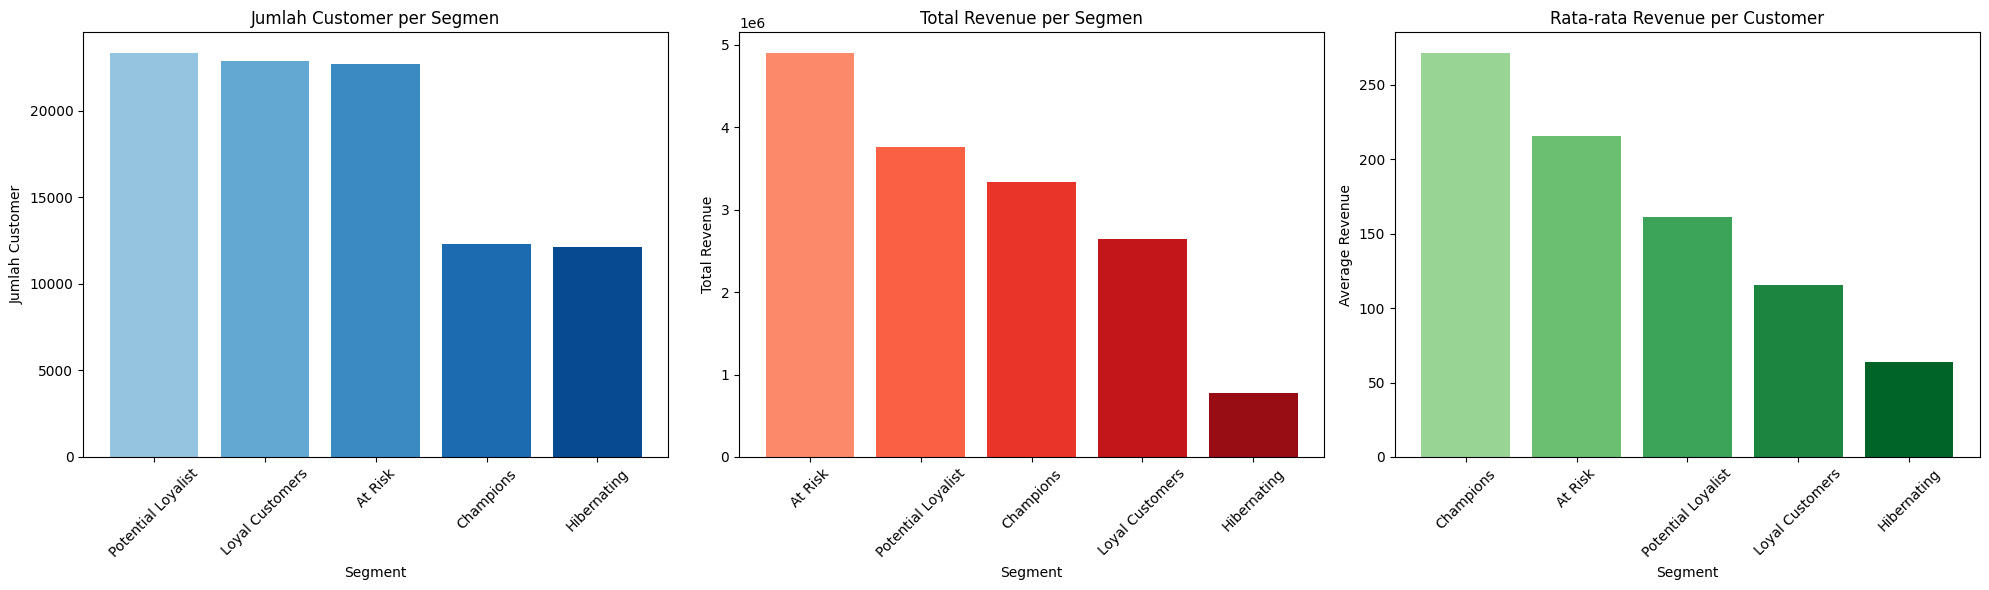

In [ ]:
# Data
segment_count = rfm_segment['segment'].value_counts()

segment_revenue = (
    rfm_segment
    .groupby('segment')['monetary']
    .sum()
    .sort_values(ascending=False)
)

segment_avg_revenue = (
    rfm_segment
    .groupby('segment')['monetary']
    .mean()
    .sort_values(ascending=False)
)

# Figure & Subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Customer Count (Blue Gradient)
colors_blue = plt.cm.Blues(
    np.linspace(0.4, 0.9, len(segment_count))
)

axes[0].bar(
    segment_count.index,
    segment_count.values,
    color=colors_blue
)
axes[0].set_title('Jumlah Customer per Segmen')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Jumlah Customer')
axes[0].tick_params(axis='x', rotation=45)

# 2. Total Revenue (Red Gradient)
colors_red = plt.cm.Reds(
    np.linspace(0.4, 0.9, len(segment_revenue))
)

axes[1].bar(
    segment_revenue.index,
    segment_revenue.values,
    color=colors_red
)
axes[1].set_title('Total Revenue per Segmen')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)

# 3. Average Revenue (Green Gradient)
colors_green = plt.cm.Greens(
    np.linspace(0.4, 0.9, len(segment_avg_revenue))
)

axes[2].bar(
    segment_avg_revenue.index,
    segment_avg_revenue.values,
    color=colors_green
)
axes[2].set_title('Rata-rata Revenue per Customer')
axes[2].set_xlabel('Segment')
axes[2].set_ylabel('Average Revenue')
axes[2].tick_params(axis='x', rotation=45)

# Layout
plt.tight_layout()
plt.show()


**Insight:**
- Segmen dengan jumlah customer terbanyak bukan selalu penyumbang revenue terbesar

- Champions memiliki customer value tertinggi meskipun jumlahnya lebih sedikit

- At Risk adalah segmen paling kritikal secara bisnis

# Pertanyaan 2: Kategori produk apa yang paling berkontribusi terhadap total pendapatan dan bagaimana pola pembeliannya?

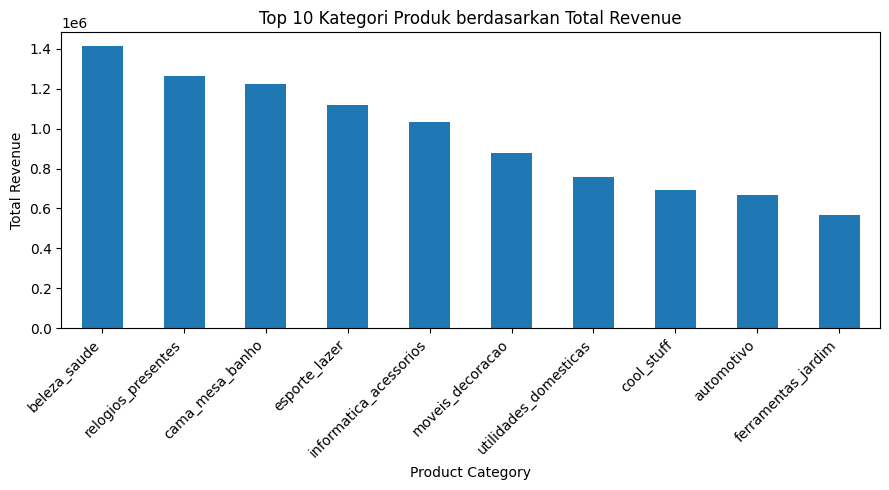

In [ ]:
# Ambil 10 kategori dengan revenue terbesar
top10_category_revenue = category_revenue.head(10)

plt.figure(figsize=(9, 5))
top10_category_revenue.plot(kind='bar')

plt.title('Top 10 Kategori Produk berdasarkan Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

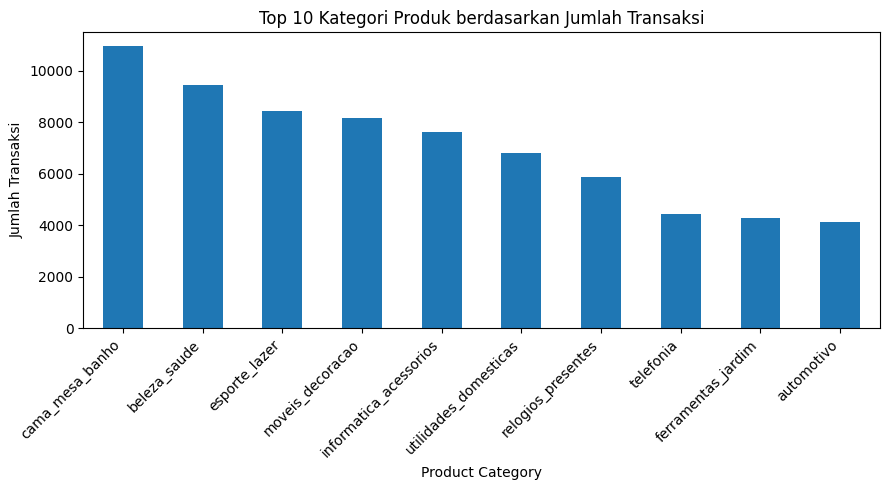

In [ ]:
# Jumlah transaksi (order item) per kategori
category_orders = (
    orders_full
    .groupby('product_category_name')['order_id']
    .count()
    .sort_values(ascending=False)
)

top10_category_orders = category_orders.head(10)

plt.figure(figsize=(9, 5))
top10_category_orders.plot(kind='bar')

plt.title('Top 10 Kategori Produk berdasarkan Jumlah Transaksi')
plt.xlabel('Product Category')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Agregasi data per kategori

category_summary = (
    orders_full
    .groupby('product_category_name')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_transactions=('order_id', 'nunique')
    )
    .reset_index()
)

# Hitung average revenue per transaction
category_summary['avg_revenue_per_transaction'] = (
    category_summary['total_revenue'] /
    category_summary['total_transactions']
)

category_summary.head()

,product_category_name,total_revenue,total_transactions,avg_revenue_per_transaction
0,agro_industria_e_comercio,76203.30,177,430.527119
1,alimentos,35794.68,441,81.167075
2,alimentos_bebidas,19337.77,221,87.501222
3,artes,27485.53,195,140.951436
4,artes_e_artesanato,2184.14,23,94.962609


In [ ]:
# Top 10 kategori berdasarkan revenue

top10_category = (
    category_summary
    .sort_values('total_revenue', ascending=False)
    .head(10)
)

top10_category

,product_category_name,total_revenue,total_transactions,avg_revenue_per_transaction
11,beleza_saude,1412089.53,8647,163.303982
66,relogios_presentes,1264333.12,5495,230.087920
13,cama_mesa_banho,1225209.26,9272,132.140774
32,esporte_lazer,1118256.91,7530,148.506894
44,informatica_acessorios,1032723.77,6530,158.150654
54,moveis_decoracao,880329.92,6307,139.579819
73,utilidades_domesticas,758392.25,5743,132.055067
26,cool_stuff,691680.89,3559,194.346977
8,automotivo,669454.75,3810,175.709908
40,ferramentas_jardim,567145.68,3448,164.485406


In [ ]:
# Interpretasi Gap

# Hitung median sebagai threshold
median_transactions = top10_category['total_transactions'].median()
median_avg_revenue = top10_category['avg_revenue_per_transaction'].median()

def classify_pattern(row):
    if row['total_transactions'] >= median_transactions and row['avg_revenue_per_transaction'] >= median_avg_revenue:
        return 'High Frequency – High Value'
    elif row['total_transactions'] >= median_transactions:
        return 'High Frequency – Low Value'
    elif row['avg_revenue_per_transaction'] >= median_avg_revenue:
        return 'Low Frequency – High Value'
    else:
        return 'Low Frequency – Low Value'

top10_category['purchase_pattern'] = top10_category.apply(classify_pattern, axis=1)

top10_category[['product_category_name', 'purchase_pattern']]

,product_category_name,purchase_pattern
11,beleza_saude,High Frequency – High Value
66,relogios_presentes,Low Frequency – High Value
13,cama_mesa_banho,High Frequency – Low Value
32,esporte_lazer,High Frequency – Low Value
44,informatica_acessorios,High Frequency – Low Value
54,moveis_decoracao,High Frequency – Low Value
73,utilidades_domesticas,Low Frequency – Low Value
26,cool_stuff,Low Frequency – High Value
8,automotivo,Low Frequency – High Value
40,ferramentas_jardim,Low Frequency – High Value


**Insight:**
- Kategori dengan revenue tinggi tidak selalu memiliki jumlah transaksi tertinggi.

- Kategori kebutuhan sehari-hari cenderung high frequency, sementara kategori hadiah & spesifik cenderung high value.

# Pertanyaan 3: Apakah terdapat pola waktu tertentu yang memengaruhi jumlah transaksi dan total pendapatan?

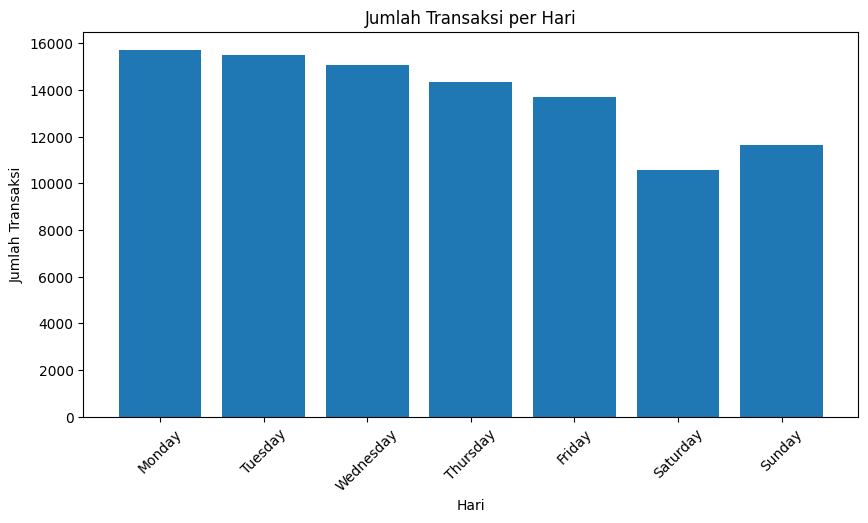

In [ ]:
# Pola Transaksi & Revenue per Hari

plt.figure(figsize=(10,5))
plt.bar(dow_summary['order_day_name'], dow_summary['total_orders'])
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

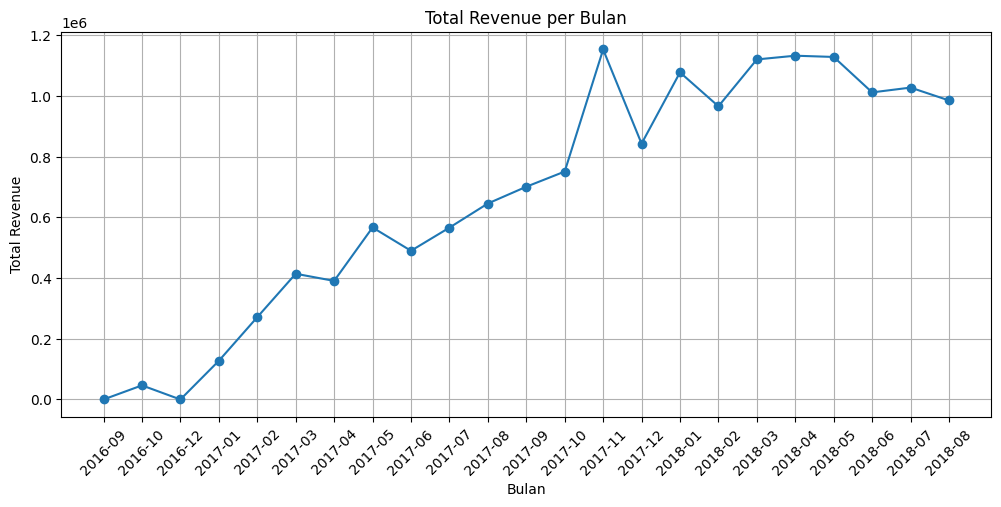

In [ ]:
# Pola Bulanan

plt.figure(figsize=(12,5))
plt.plot(
    monthly_summary['order_month'],
    monthly_summary['total_revenue'],
    marker='o'
)
plt.title('Total Revenue per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

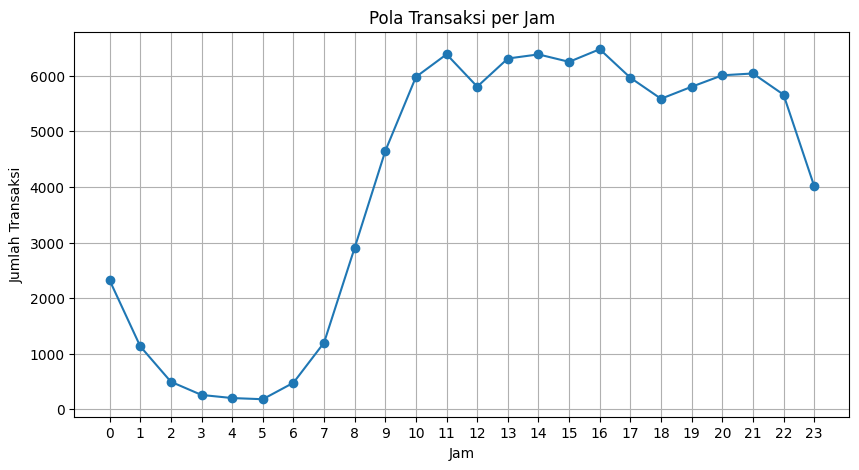

In [ ]:
# Pola Jam Transaksi

plt.figure(figsize=(10,5))
plt.plot(
    hourly_summary['order_hour'],
    hourly_summary['total_orders'],
    marker='o'
)
plt.title('Pola Transaksi per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

**Insight:**
- Aktivitas belanja lebih aktif pada hari kerja, kemungkinan dipengaruhi oleh rutinitas kerja dan kebiasaan belanja online saat jam produktif.

- Terdapat pola seasonality dan growth, yang mengindikasikan peningkatan adopsi platform serta kemungkinan pengaruh kampanye promosi atau periode belanja tertentu.

- Mayoritas transaksi terjadi pada jam aktif pengguna, terutama saat jam kerja dan siang hari.

# Pertanyaan 4: Wilayah mana yang memberikan kontribusi terbesar terhadap pendapatan dan jumlah pelanggan?

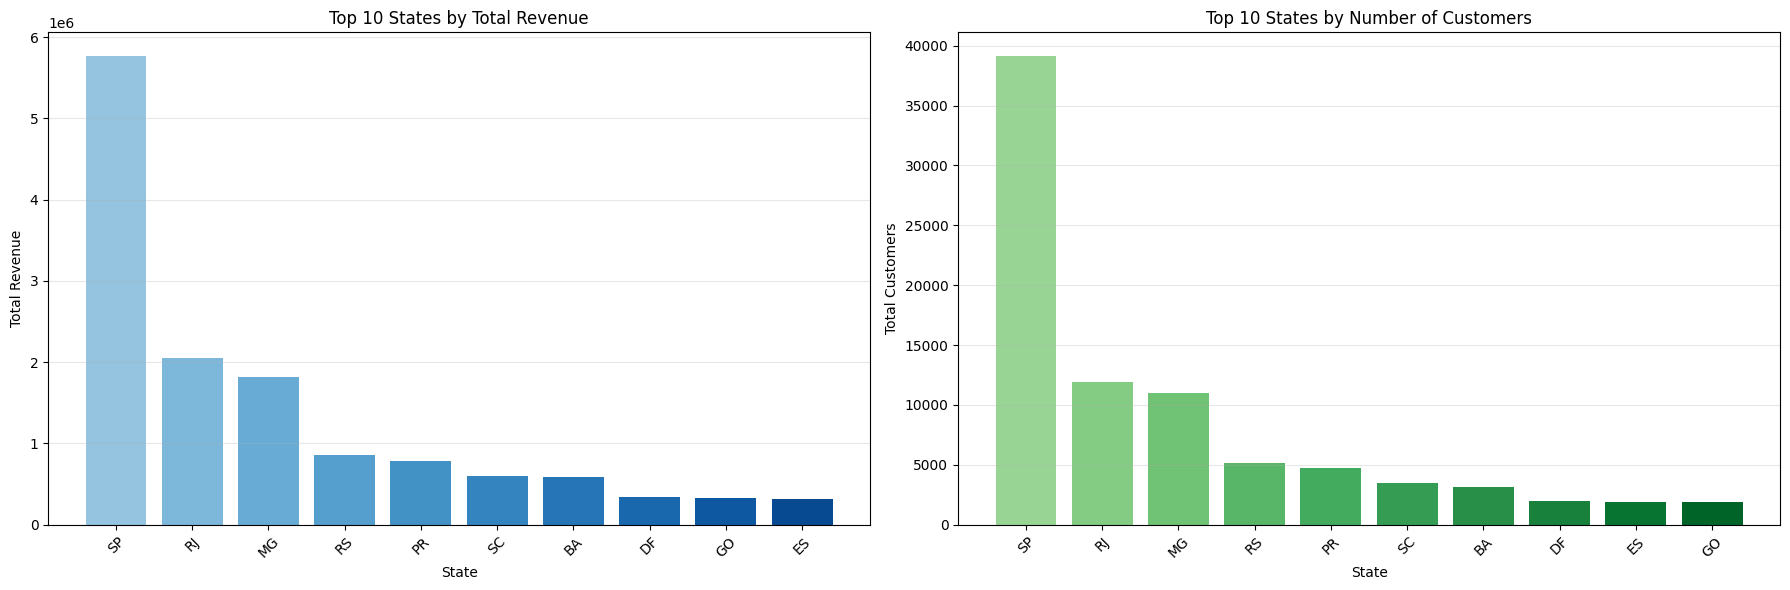

In [ ]:
# Prepare Data
top10_revenue = (
    geo_summary
    .sort_values(by='total_revenue', ascending=False)
    .head(10)
)

top10_customers = (
    geo_summary
    .sort_values(by='total_customers', ascending=False)
    .head(10)
)

# Figure & Subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Total Revenue per State (Blue Gradient)
colors_blue = plt.cm.Blues(
    np.linspace(0.4, 0.9, len(top10_revenue))
)

axes[0].bar(
    top10_revenue['customer_state'],
    top10_revenue['total_revenue'],
    color=colors_blue
)

axes[0].set_title('Top 10 States by Total Revenue')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Total Customers per State (Green Gradient)
colors_green = plt.cm.Greens(
    np.linspace(0.4, 0.9, len(top10_customers))
)

axes[1].bar(
    top10_customers['customer_state'],
    top10_customers['total_customers'],
    color=colors_green
)

axes[1].set_title('Top 10 States by Number of Customers')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Total Customers')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Layout
plt.tight_layout()
plt.show()

**Insight:**
- SP mendominasi baik dari sisi pendapatan maupun jumlah pelanggan, menjadikannya wilayah paling strategis bagi bisnis.

- State seperti RJ dan MG menunjukkan pola yang konsisten:
jumlah pelanggan tinggi dengan kontribusi pendapatan juga tinggi.

- Pendapatan dan pelanggan tidak tersebar merata di seluruh wilayah. Ada ketergantungan tinggi pada beberapa state utama, terutama SP.

## Conclusion

# 1. Bagaimana karakteristik pelanggan berdasarkan perilaku pembelian mereka menggunakan pendekatan RFM Analysis?

#### Berdasarkan hasil RFM Analysis, pelanggan dapat dikelompokkan ke dalam beberapa segmen dengan karakteristik perilaku pembelian yang berbeda. Segmen Champions memiliki nilai pelanggan tertinggi dengan rata-rata revenue per customer terbesar, meskipun jumlahnya relatif lebih kecil. Segmen Potential Loyalist dan Loyal Customers mendominasi secara jumlah, menunjukkan basis pelanggan yang kuat namun dengan nilai transaksi per customer yang masih dapat ditingkatkan.

#### Segmen At Risk memberikan kontribusi revenue terbesar, namun menunjukkan indikasi penurunan aktivitas pembelian sehingga memiliki risiko churn yang tinggi. Sementara itu, segmen Hibernating memiliki kontribusi paling rendah baik dari sisi jumlah maupun revenue. Secara keseluruhan, hasil ini menunjukkan bahwa tidak semua pelanggan memiliki dampak bisnis yang sama, dan strategi yang berbeda diperlukan untuk setiap segmen berdasarkan perilaku pembeliannya

# 2. Kategori produk apa yang paling berkontribusi terhadap total pendapatan dan bagaimana pola pembeliannya?

#### Berdasarkan analisis kategori produk, kontribusi terbesar terhadap total pendapatan berasal dari kategori **beleza_saude**, **relogios_presentes**, dan **cama_mesa_banho**. Namun, pola pembeliannya menunjukkan karakteristik yang berbeda. Kategori beleza_saude memiliki pola pembelian **High Frequency – High Value** yang menjadikannya kontributor revenue paling stabil.

#### Kategori seperti **cama_mesa_banho**, **esporte_lazer**, dan **informatica_acessorios** memiliki jumlah transaksi tinggi tetapi nilai transaksi relatif lebih rendah, sehingga revenue didorong oleh volume pembelian. Sebaliknya, kategori seperti **relogios_presentes** dan **automotivo** memiliki nilai transaksi yang tinggi meskipun frekuensi pembeliannya lebih rendah.

#### Hal ini menunjukkan bahwa kontribusi pendapatan antar kategori tidak hanya dipengaruhi oleh jumlah transaksi, tetapi juga oleh nilai transaksi per pembelian, sehingga setiap kategori memiliki pola pembelian yang berbeda.

# 3. Apakah terdapat pola waktu tertentu yang memengaruhi jumlah transaksi dan total pendapatan?

  #### Berdasarkan analisis pola waktu, terdapat hubungan yang jelas antara waktu dan aktivitas transaksi. Jumlah transaksi cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan puncak aktivitas terjadi pada jam-jam produktif antara pagi hingga sore hari.

#### Selain itu, total revenue menunjukkan tren peningkatan secara bulanan dengan beberapa periode puncak, yang mengindikasikan adanya faktor musiman dan pertumbuhan bisnis. Hal ini menunjukkan bahwa waktu berperan penting dalam memengaruhi baik jumlah transaksi maupun total pendapatan

# 4. Wilayah mana yang memberikan kontribusi terbesar terhadap pendapatan dan jumlah pelanggan?

#### Berdasarkan analisis, wilayah yang memberikan kontribusi terbesar terhadap pendapatan dan jumlah pelanggan adalah **São Paulo** (SP). SP tidak hanya mencatat total pendapatan tertinggi, tetapi juga memiliki jumlah pelanggan paling banyak dibandingkan wilayah lainnya.

#### Selain SP, wilayah **Rio de Janeiro** (RJ) dan **Minas Gerais** (MG) juga menunjukkan kontribusi signifikan baik dari sisi pendapatan maupun jumlah pelanggan. Temuan ini menunjukkan bahwa aktivitas bisnis dan basis pelanggan perusahaan terkonsentrasi di beberapa wilayah utama, dengan SP sebagai pasar paling dominan.